## Data Quality Checking

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scripts.db_utils import connect, sql_to_dataframe
from src.data_quality_checks import check_missing_data, check_duplicates, check_data_types, check_numeric_anomalies, get_numeric_columns, get_total_missing_percentage
from src.utils import bytes_to_gigabytes, kilobytes_per_second_to_megabytes_per_second, milliseconds_to_hours, milliseconds_to_minutes, bytes_to_megabytes, milliseconds_to_seconds



In [2]:
#opening the connection
conn = connect()

query = """ SELECT * FROM public.xdr_data  """

#loading our dataframe
df = sql_to_dataframe(conn, query)

#closing the connection
conn.close()

# Let’s see if we loaded the df successfully
df.head()

Connecting..
All good, Connection successful!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# checking for missing value in each columns
missing_data_summary = check_missing_data(df)
print(missing_data_summary)

                                 Column Name  Missing Values
0                                  Bearer Id             991
1                                      Start               1
2                                   Start ms               1
3                                        End               1
4                                     End ms               1
5                                  Dur. (ms)               1
6                                       IMSI             570
7                              MSISDN/Number            1066
8                                       IMEI             572
9                         Last Location Name            1153
10                           Avg RTT DL (ms)           27829
11                           Avg RTT UL (ms)           27812
12                   Avg Bearer TP DL (kbps)               1
13                   Avg Bearer TP UL (kbps)               1
14               TCP DL Retrans. Vol (Bytes)           88146
15               TCP UL 

In [4]:
# Calculate total percentage of missing values
missing_data_percentage = get_total_missing_percentage(df)
print(f"Total Percentage of Missing Values: {missing_data_percentage:.2f}%")

Total Percentage of Missing Values: 12.50%


In [5]:
# checking for duplicated rows in the datasets
duplicate_rows = check_duplicates(df)
print(duplicate_rows)

Success: No duplicated values.


In [6]:
# checking for data type issues per each columns
dtypes_summary = check_data_types(df)
print(dtypes_summary)

Success: Data types per column are uniform.


In [7]:
# list all numberical columns 
numeric_columns = get_numeric_columns(df)
print(numeric_columns)

['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email 

In [8]:
# checking for anomalies in all numeric columns
for numeric_column in numeric_columns:
    numeric_anomalies = check_numeric_anomalies(df, numeric_column, lower_bound=0, upper_bound=None)
    print(numeric_anomalies)

Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success:

## Data Preprocessing

### Data Cleaning

In [9]:
# Calculate total percentage of missing values
missing_data_percentage = get_total_missing_percentage(df)
print(f"Total Percentage of Missing Values before cleaning: {missing_data_percentage}%")

Total Percentage of Missing Values before cleaning: 12.501637867868759%


In [10]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [11]:
# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

In [12]:
# Convert numerical columns to the correct data type
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Impute missing values for numerical columns using mean strategy
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

In [14]:
# Impute missing values for categorical columns using most frequent strategy (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

In [15]:
# Calculate total percentage of missing values
missing_data_percentage = get_total_missing_percentage(df)
print(f"Total Percentage of Missing Values after cleaning: {missing_data_percentage}%")

Total Percentage of Missing Values after cleaning: 0.0278664808901274%


### Selecting Relevant columns

In [16]:
# Customizing some columns and do some unit conversions 
df['Social Media (GB)'] = df['Social Media DL (Bytes)'].apply(bytes_to_megabytes) + df['Social Media UL (Bytes)'].apply(bytes_to_megabytes)
df['Youtube (GB)'] = df['Youtube DL (Bytes)'].apply(bytes_to_megabytes) + df['Youtube UL (Bytes)'].apply(bytes_to_megabytes)
df['Google (GB)'] = (df['Google DL (Bytes)'] + df['Google UL (Bytes)']).apply(bytes_to_megabytes)
df['Email (GB)'] = (df['Email DL (Bytes)'] + df['Email UL (Bytes)']).apply(bytes_to_megabytes)
df['Netflix (GB)'] = (df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']).apply(bytes_to_megabytes)
df['Gaming (GB)'] = (df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']).apply(bytes_to_megabytes)
df['Other (GB)'] = (df['Other DL (Bytes)'] + df['Other UL (Bytes)']).apply(bytes_to_megabytes)
df['Total Data (GB)'] = df['Total DL (Bytes)'].apply(bytes_to_megabytes) + df['Total UL (Bytes)'].apply(bytes_to_megabytes)
df['Dur. (hr)'] = df['Dur. (ms).1'].apply(milliseconds_to_hours)
df['Avg RTT DL (sec)'] = df['Avg RTT DL (ms)'].apply(milliseconds_to_seconds)
df['Avg RTT UL (sec)'] = df['Avg RTT UL (ms)'].apply(milliseconds_to_seconds)
df['Avg Bearer TP DL (Mbps)'] = df['Avg Bearer TP DL (kbps)'].apply(kilobytes_per_second_to_megabytes_per_second)
df['Avg Bearer TP UL (Mbps)'] = df['Avg Bearer TP UL (kbps)'].apply(kilobytes_per_second_to_megabytes_per_second)

# Apply conversion functions to columns and store results in new columns
df['Total DL (Mb)'] = df['Total DL (Bytes)'].apply(bytes_to_megabytes)
df['Total UL (Mb)'] = df['Total UL (Bytes)'].apply(bytes_to_megabytes)
df['Social Media DL (Mb)'] = df['Social Media DL (Bytes)'].apply(bytes_to_megabytes)
df['Social Media UL (Mb)'] = df['Social Media UL (Bytes)'].apply(bytes_to_megabytes)
df['Google DL (Mb)'] = df['Google DL (Bytes)'].apply(bytes_to_megabytes)
df['Google UL (Mb)'] = df['Google UL (Bytes)'].apply(bytes_to_megabytes)
df['Email DL (Mb)'] = df['Email DL (Bytes)'].apply(bytes_to_megabytes)
df['Email UL (Mb)'] = df['Email UL (Bytes)'].apply(bytes_to_megabytes)
df['Youtube DL (Mb)'] = df['Youtube DL (Bytes)'].apply(bytes_to_megabytes)
df['Youtube UL (Mb)'] = df['Youtube UL (Bytes)'].apply(bytes_to_megabytes)
df['Netflix DL (Mb)'] = df['Netflix DL (Bytes)'].apply(bytes_to_megabytes)
df['Netflix UL (Mb)'] = df['Netflix UL (Bytes)'].apply(bytes_to_megabytes)
df['Gaming DL (Mb)'] = df['Gaming DL (Bytes)'].apply(bytes_to_megabytes)
df['Gaming UL (Mb)'] = df['Gaming UL (Bytes)'].apply(bytes_to_megabytes)
df['Other DL (Mb)'] = df['Other DL (Bytes)'].apply(bytes_to_megabytes)
df['Other UL (Mb)'] = df['Other UL (Bytes)'].apply(bytes_to_megabytes)
df['Dur. (hr)'] = df['Dur. (ms).1'].apply(milliseconds_to_hours)
df['Dur. (sec)'] = df['Dur. (ms).1'].apply(milliseconds_to_seconds)

# Calculate total data volume (DL+UL) for each application
df['Social Media Data (Mb)'] = df['Social Media DL (Mb)'] + df['Social Media UL (Mb)']
df['Youtube Data (Mb)'] = df['Youtube DL (Mb)'] + df['Youtube UL (Mb)']
df['Email Data (Mb)'] = df['Email DL (Mb)'] + df['Email UL (Mb)']
df['Gaming Data (Mb)'] = df['Gaming DL (Mb)'] + df['Gaming UL (Mb)']
df['Netflix Data (Mb)'] = df['Netflix DL (Mb)'] + df['Netflix UL (Mb)']
df['Google Data (Mb)'] = df['Google DL (Mb)'] + df['Google UL (Mb)']
df['Other Data (Mb)'] = df['Other DL (Mb)'] + df['Other UL (Mb)']
df['Total Data (Mb)'] = df['Total DL (Mb)'] + df['Total UL (Mb)']
df['Avg Bearer TP (Mbps)'] = df['Avg Bearer TP DL (Mbps)'] + df['Avg Bearer TP UL (Mbps)']
df['Avg RTT (sec)'] = df['Avg RTT DL (sec)'] + df['Avg RTT UL (sec)']
df['TCP Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['TCP Retrans. Vol (Mb)'] = df['TCP Retrans. Vol (Bytes)'].apply(bytes_to_megabytes)

# Convert 'Start' to datetime format
df['Start'] = pd.to_datetime(df['Start'])

# Extract date part only and save it to a new column 'Date'
df['Date'] = df['Start'].dt.date

In [17]:
# Create a new DataFrame with selected columns
selected_columns = ['Total Data (Mb)', 'MSISDN/Number', 'Date',
                    'Handset Manufacturer', 'Handset Type', 'Bearer Id',
                    'Avg Bearer TP (Mbps)', 'TCP Retrans. Vol (Mb)', 'Avg RTT (sec)',
                    'Dur. (hr)',
                    'Last Location Name',
                    'Gaming Data (Mb)', 'Netflix Data (Mb)', 'Email Data (Mb)', 'Google Data (Mb)', 'Youtube Data (Mb)', 'Social Media Data (Mb)', 'Other Data (Mb)']

df_relevant = df[selected_columns]
print(df_relevant.columns)

Index(['Total Data (Mb)', 'MSISDN/Number', 'Date', 'Handset Manufacturer',
       'Handset Type', 'Bearer Id', 'Avg Bearer TP (Mbps)',
       'TCP Retrans. Vol (Mb)', 'Avg RTT (sec)', 'Dur. (hr)',
       'Last Location Name', 'Gaming Data (Mb)', 'Netflix Data (Mb)',
       'Email Data (Mb)', 'Google Data (Mb)', 'Youtube Data (Mb)',
       'Social Media Data (Mb)', 'Other Data (Mb)'],
      dtype='object')


## Exploratory Data Analysis

### Data Summary

#### For Categorical Data

In [18]:
# Simple Tabulation for Handset Manufacturer
print("--- Simple Tabulation for Handset Manufacturer ---")
counts_manufacturer = df_relevant['Handset Manufacturer'].value_counts()
total_manufacturer = counts_manufacturer.sum()
percentages_manufacturer = counts_manufacturer.apply(lambda x: round((x / total_manufacturer) * 100, 2))

result_manufacturer = pd.DataFrame({'Handset Manufacturer': counts_manufacturer.index, 'Count': counts_manufacturer.values, 'Percentage': percentages_manufacturer.values})
result_manufacturer.head(10)

--- Simple Tabulation for Handset Manufacturer ---


,Handset Manufacturer,Count,Percentage
0,Apple,59565,39.86
1,Samsung,40839,27.33
2,Huawei,34423,23.04
3,undefined,8987,6.01
4,Sony Mobile Communications Ab,980,0.66
5,Wiko Global Sasu,747,0.50
6,Xiaomi Communications Co Ltd,397,0.27
7,Oneplus Technology (Shenzhen) Co Ltd,342,0.23
8,Asustek,285,0.19
9,Lenovo,254,0.17


In [19]:
# Simple Tabulation for Handset Type
print("--- Simple Tabulation for Handset Type ---")
counts_type = df_relevant['Handset Type'].value_counts()
total_type = counts_type.sum()
percentages_type = counts_type.apply(lambda x: round((x / total_type) * 100, 2))

result_type = pd.DataFrame({'Handset Type': counts_type.index, 'Count': counts_type.values, 'Percentage': percentages_type.values})
top_10_result = result_type.head(10)

--- Simple Tabulation for Handset Type ---


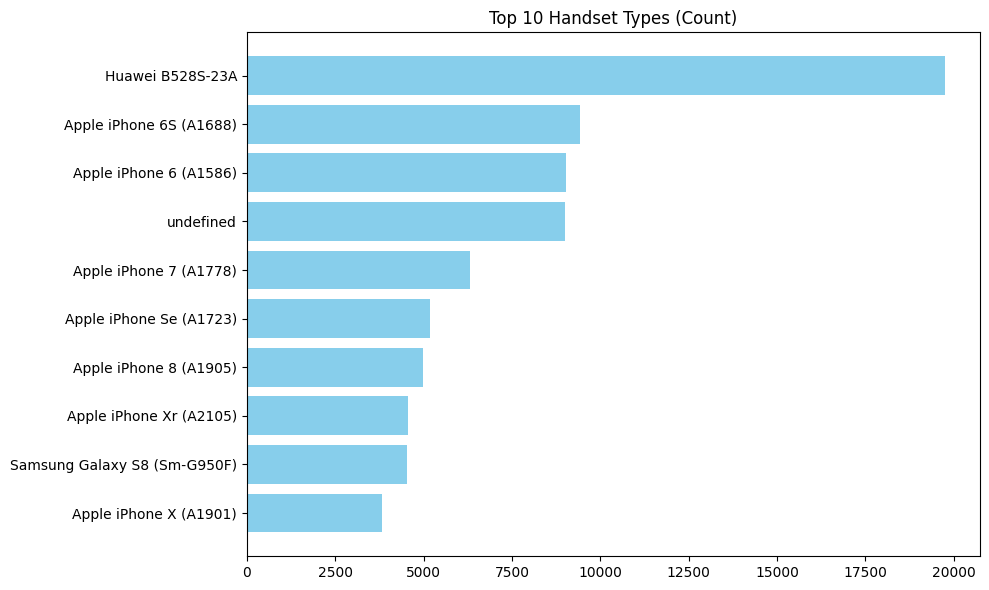

In [20]:
# Sort by count in ascending order
top_10_result = top_10_result.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_result['Handset Type'], top_10_result['Count'], color='skyblue')
plt.title('Top 10 Handset Types (Count)')
plt.tight_layout()
plt.show()

In [21]:
# Simple Tabulation for Last Location Name
print("--- Simple Tabulation for Last Location Name ---")
counts_location = df_relevant['Last Location Name'].value_counts()
total_location = counts_location.sum()
percentages_location = counts_location.apply(lambda x: round((x / total_location) * 100, 2))

result_location = pd.DataFrame({'Last Location Name': counts_location.index, 'Count': counts_location.values, 'Percentage': percentages_location.values})

print(result_location)

--- Simple Tabulation for Last Location Name ---
          Last Location Name  Count  Percentage
0                    D41377B     80        0.05
1                    D17085A     59        0.04
2                    D72396C     57        0.04
3      9.16456698599501E+015     55        0.04
4                    D73604C     55        0.04
...                      ...    ...         ...
45542                T79480A      1        0.00
45543                T10447C      1        0.00
45544                T37799B      1        0.00
45545                T79346B      1        0.00
45546                L88342B      1        0.00

[45547 rows x 3 columns]


In [22]:
# Convert the date column to datetime format for accurate comparison
date_column = pd.to_datetime(df['Start'])

# Find the minimum and maximum dates
min_date = date_column.min()
max_date = date_column.max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2019-04-04 12:01:00
Maximum Date: 2019-04-29 07:28:00


In [23]:
# Function to list top 5 handset types for a given manufacturer
def top_handsets_for_manufacturer(manufacturer):
    df_manufacturer = df_relevant[df_relevant['Handset Manufacturer'] == manufacturer]
    top_handsets = df_manufacturer['Handset Type'].value_counts().head(5)
    top_handsets_percentage = (top_handsets / top_handsets.sum()) * 100
    result_top_handsets = pd.DataFrame({'Handset Type': top_handsets.index, 'Count': top_handsets.values, 'Percentage': top_handsets_percentage.values})
    return result_top_handsets

In [24]:
manufacturer = 'Samsung'  # Enter the top manufacturer here
top_handsets_df = top_handsets_for_manufacturer(manufacturer)
samsung_handsets = top_handsets_df.head(5)
samsung_handsets_count = samsung_handsets['Count']
samsung_handsets_type = samsung_handsets['Handset Type']

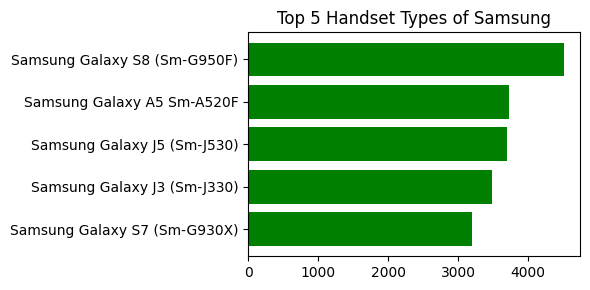

In [25]:
# Sort by count in ascending order
samsung_top_5_result = samsung_handsets.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(6, 3))
plt.barh(samsung_top_5_result['Handset Type'], samsung_top_5_result['Count'], color='green')
plt.title('Top 5 Handset Types of Samsung')
plt.tight_layout()
plt.show()

In [26]:
manufacturer = 'Apple'  # Enter the top manufacturer here
top_handsets_df = top_handsets_for_manufacturer(manufacturer)
apple_handsets = top_handsets_df.head(5)
apple_handsets_count = apple_handsets['Count']
apple_handsets_type = apple_handsets['Handset Type']

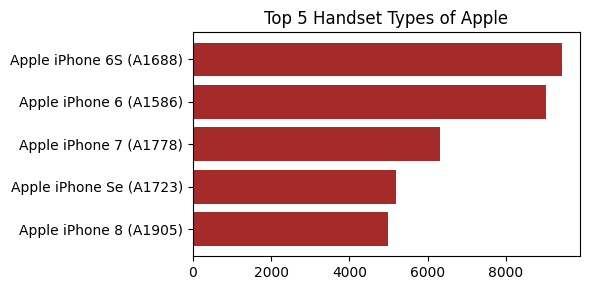

In [27]:
# Sort by count in ascending order
apple_top_5_result = apple_handsets.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(6, 3))
plt.barh(apple_top_5_result['Handset Type'], apple_top_5_result['Count'], color='brown')
plt.title('Top 5 Handset Types of Apple')
plt.tight_layout()
plt.show()

In [28]:
manufacturer = 'Huawei'  # Enter the top manufacturer here
top_handsets_df = top_handsets_for_manufacturer(manufacturer)
huawei_handsets = top_handsets_df.head(5)
huawei_handsets_count = huawei_handsets['Count']
huawei_handsets_type = huawei_handsets['Handset Type']

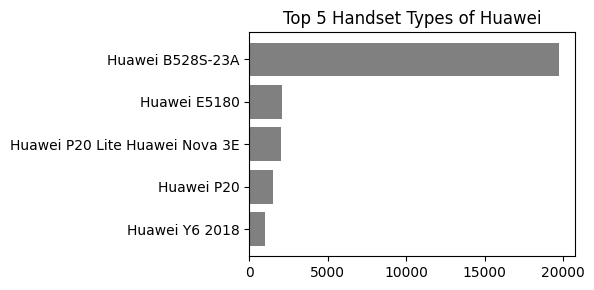

In [29]:
# Sort by count in ascending order
huawei_top_5_result = huawei_handsets.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(6, 3))
plt.barh(huawei_top_5_result['Handset Type'], huawei_top_5_result['Count'], color='grey')
plt.title('Top 5 Handset Types of Huawei')
plt.tight_layout()
plt.show()

#### For Numerical data

In [30]:
# Numerical variables descriptive summary
numerical_columns = ['Total Data (Mb)', 'Avg Bearer TP (Mbps)',
                     'TCP Retrans. Vol (Mb)', 'Avg RTT (sec)', 'Dur. (hr)',
                     'Gaming Data (Mb)', 'Netflix Data (Mb)', 'Email Data (Mb)', 'Google Data (Mb)', 'Youtube Data (Mb)', 'Social Media Data (Mb)', 'Other Data (Mb)']

In [31]:
# Calculate descriptive statistics
df_descriptions = df_relevant[numerical_columns].describe()
df_descriptions

,Total Data (Mb),Avg Bearer TP (Mbps),TCP Retrans. Vol (Mb),Avg RTT (sec),Dur. (hr),Gaming Data (Mb),Netflix Data (Mb),Email Data (Mb),Google Data (Mb),Youtube Data (Mb),Social Media Data (Mb),Other Data (Mb)
count,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,472.798001,14.717260,20.570348,0.127459,29.058085,410.397626,21.580321,2.154448,7.445616,21.594508,1.743555,409.474701
std,233.059871,26.197026,112.952429,0.565145,22.510373,232.715534,8.831806,1.021489,3.353520,8.818436,0.987669,231.998513
min,27.614696,0.000000,0.000082,0.000000,1.984163,0.292166,0.093872,0.007972,0.038462,0.075248,0.001491,0.142140
25%,271.297876,0.087891,1.423310,0.040000,15.956127,208.595218,15.239196,1.296371,4.714583,15.257323,0.889032,208.428781
50%,473.843569,0.122070,20.570348,0.067000,23.999995,411.620118,21.586938,2.158706,7.450900,21.611948,1.741858,410.067074
75%,673.776065,21.824219,20.570348,0.127459,36.786302,611.701849,27.933545,3.013437,10.187908,27.935604,2.601134,610.282416
max,911.698128,373.302734,4142.871524,96.924000,516.482345,819.399628,43.104318,4.308735,14.809401,43.096617,3.481732,819.703039


In [32]:
# Calculate mode
mode_values = df_relevant[numerical_columns].mode().iloc[0]
mode_values.head(20)

Total Data (Mb)           126.525368
Avg Bearer TP (Mbps)        0.061523
TCP Retrans. Vol (Mb)      20.570348
Avg RTT (sec)               0.127459
Dur. (hr)                  23.999987
Gaming Data (Mb)           14.449388
Netflix Data (Mb)           3.044221
Email Data (Mb)             0.618928
Google Data (Mb)            4.997341
Youtube Data (Mb)          17.964172
Social Media Data (Mb)      0.147264
Other Data (Mb)            51.533755
Name: 0, dtype: float64

In [33]:
# Assuming df_relevant is your DataFrame and numerical_columns is a list of numerical column names
median_values = df_relevant[numerical_columns].median()
median_values.head(20)  # Displaying the median values for the first 20 columns

Total Data (Mb)           473.843569
Avg Bearer TP (Mbps)        0.122070
TCP Retrans. Vol (Mb)      20.570348
Avg RTT (sec)               0.067000
Dur. (hr)                  23.999995
Gaming Data (Mb)          411.620118
Netflix Data (Mb)          21.586938
Email Data (Mb)             2.158706
Google Data (Mb)            7.450900
Youtube Data (Mb)          21.611948
Social Media Data (Mb)      1.741858
Other Data (Mb)           410.067074
dtype: float64

In [34]:
# Calculate range
range_values = df_relevant[numerical_columns].max() - df_relevant[numerical_columns].min()
range_values.head(20)

Total Data (Mb)            884.083432
Avg Bearer TP (Mbps)       373.302734
TCP Retrans. Vol (Mb)     4142.871442
Avg RTT (sec)               96.924000
Dur. (hr)                  514.498182
Gaming Data (Mb)           819.107462
Netflix Data (Mb)           43.010446
Email Data (Mb)              4.300763
Google Data (Mb)            14.770939
Youtube Data (Mb)           43.021369
Social Media Data (Mb)       3.480242
Other Data (Mb)            819.560899
dtype: float64

In [35]:
# Calculate skewness
skewness_values = df_relevant[numerical_columns].skew()
skewness_values.head(20)

Total Data (Mb)           -0.002457
Avg Bearer TP (Mbps)       2.493325
TCP Retrans. Vol (Mb)     24.466624
Avg RTT (sec)             67.660544
Dur. (hr)                  3.952622
Gaming Data (Mb)          -0.003225
Netflix Data (Mb)         -0.000409
Email Data (Mb)           -0.006033
Google Data (Mb)          -0.010602
Youtube Data (Mb)         -0.005465
Social Media Data (Mb)    -0.002121
Other Data (Mb)            0.001256
dtype: float64

In [36]:
# Calculate sum
sum_values = df_relevant[numerical_columns].sum()
sum_values.head(20)

Total Data (Mb)           7.092017e+07
Avg Bearer TP (Mbps)      2.207604e+06
TCP Retrans. Vol (Mb)     3.085573e+06
Avg RTT (sec)             1.911892e+04
Dur. (hr)                 4.358742e+06
Gaming Data (Mb)          6.156005e+07
Netflix Data (Mb)         3.237070e+06
Email Data (Mb)           3.231693e+05
Google Data (Mb)          1.116850e+06
Youtube Data (Mb)         3.239198e+06
Social Media Data (Mb)    2.615350e+05
Other Data (Mb)           6.142161e+07
dtype: float64

In [37]:
# calculate total number of customers 
unique_msisdn_numbers = df_relevant['MSISDN/Number'].unique()
print(len(unique_msisdn_numbers))

106857


In [38]:
# calculate total number of customers 
unique_locations = df_relevant['Last Location Name'].unique()
print(len(unique_locations))

45548


## User Overview

#### Aggregating User Behavior Data

In [39]:
# Step 1: Group by user
grouped_data = df_relevant.groupby('MSISDN/Number')

# Step 2: Compute aggregates
user_behavior_summary = grouped_data.agg({
    'Bearer Id': 'count',
    'Total Data (Mb)': 'sum',
    'Social Media Data (Mb)': 'sum',
    'Google Data (Mb)': 'sum',
    'Email Data (Mb)': 'sum',
    'Youtube Data (Mb)': 'sum',
    'Netflix Data (Mb)': 'sum',
    'Gaming Data (Mb)': 'sum',
    'Other Data (Mb)': 'sum',
    'Avg Bearer TP (Mbps)': 'sum',
    'TCP Retrans. Vol (Mb)': 'sum',
    'Avg RTT (sec)': 'sum',
    'Dur. (hr)': 'sum',

})

user_behavior_summary.rename(columns={'Bearer Id': 'Number of Sessions'}, inplace=True)

# Step 3: Sort by Number of Sessions in descending order
user_behavior_summary_sorted = user_behavior_summary.sort_values(by='Total Data (Mb)', ascending=False)


# Display the aggregated user behavior data
user_behavior_summary_sorted.head(5)
user_behavior_summary_sorted.tail(5)

,Number of Sessions,Total Data (Mb),Social Media Data (Mb),Google Data (Mb),Email Data (Mb),Youtube Data (Mb),Netflix Data (Mb),Gaming Data (Mb),Other Data (Mb),Avg Bearer TP (Mbps),TCP Retrans. Vol (Mb),Avg RTT (sec),Dur. (hr)
MSISDN/Number,,,,,,,,,,,,,
3.367548e+10,1,36.260945,0.058599,1.534470,0.718514,23.149885,4.396620,5.576456,170.025167,46.547852,0.054556,0.044000,10.658788
3.378251e+10,1,36.172143,1.374470,1.511680,0.919835,10.496247,7.954366,11.304402,362.053472,0.103516,20.570348,0.045000,28.524947
3.366668e+10,1,32.424568,0.715888,4.138419,2.457558,3.745266,16.630870,1.889071,284.862541,0.100586,20.570348,0.127459,52.866856
3.366132e+10,1,32.020416,0.594598,3.050110,3.492670,9.878783,3.051894,9.732025,444.053609,0.081055,20.570348,0.031000,46.165176
3.365920e+10,1,31.708726,1.218530,3.899412,0.309261,12.075002,6.665761,6.733036,487.673726,0.303711,19.846355,0.077000,11.904702


#### divide users based on session duration

In [40]:
# Define session duration categories
df['Session Category'] = pd.cut(df['Dur. (hr)'], bins=[0, 29, 60, float('inf')], labels=['Short', 'Medium', 'Long'])

# Group by session category and calculate sum of data usage and count of unique customers
usage_analysis = df.groupby('Session Category').agg({'Total Data (Mb)': 'sum', 'MSISDN/Number': 'nunique'})

# Rename the columns for clarity
usage_analysis = usage_analysis.rename(columns={'Total Data (Mb)': 'Total Data Sum (Mb)', 'MSISDN/Number': 'Unique Customers Count'})

# Calculate percentage columns
total_data_sum = usage_analysis['Total Data Sum (Mb)'].sum()
usage_analysis['Total Data Percentage'] = (usage_analysis['Total Data Sum (Mb)'] / total_data_sum) * 100
usage_analysis['Unique Customers Percentage'] = (usage_analysis['Unique Customers Count'] / usage_analysis['Unique Customers Count'].sum()) * 100

# Print the results
usage_analysis.head(10)

/tmp/ipykernel_15569/514096812.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_analysis = df.groupby('Session Category').agg({'Total Data (Mb)': 'sum', 'MSISDN/Number': 'nunique'})


,Total Data Sum (Mb),Unique Customers Count,Total Data Percentage,Unique Customers Percentage
Session Category,,,,
Short,4.700874e+07,73369,66.284019,62.484777
Medium,1.906128e+07,35769,26.877094,30.462702
Long,4.850151e+06,8281,6.838887,7.052521


#### correlation between all apps data usage

Correlation Matrix:
                        Gaming Data (Mb)  Netflix Data (Mb)  Email Data (Mb)  \
Gaming Data (Mb)                1.000000          -0.003109        -0.000644   
Netflix Data (Mb)              -0.003109           1.000000         0.001029   
Email Data (Mb)                -0.000644           0.001029         1.000000   
Google Data (Mb)               -0.000994          -0.001902        -0.000412   
Youtube Data (Mb)              -0.002999           0.002882        -0.002919   
Social Media Data (Mb)          0.001082           0.001013         0.004032   
Other Data (Mb)                -0.002661          -0.009033        -0.001299   
Total Data (Mb)                 0.998254           0.034798         0.003768   

                        Google Data (Mb)  Youtube Data (Mb)  \
Gaming Data (Mb)               -0.000994          -0.002999   
Netflix Data (Mb)              -0.001902           0.002882   
Email Data (Mb)                -0.000412          -0.002919   
Google 

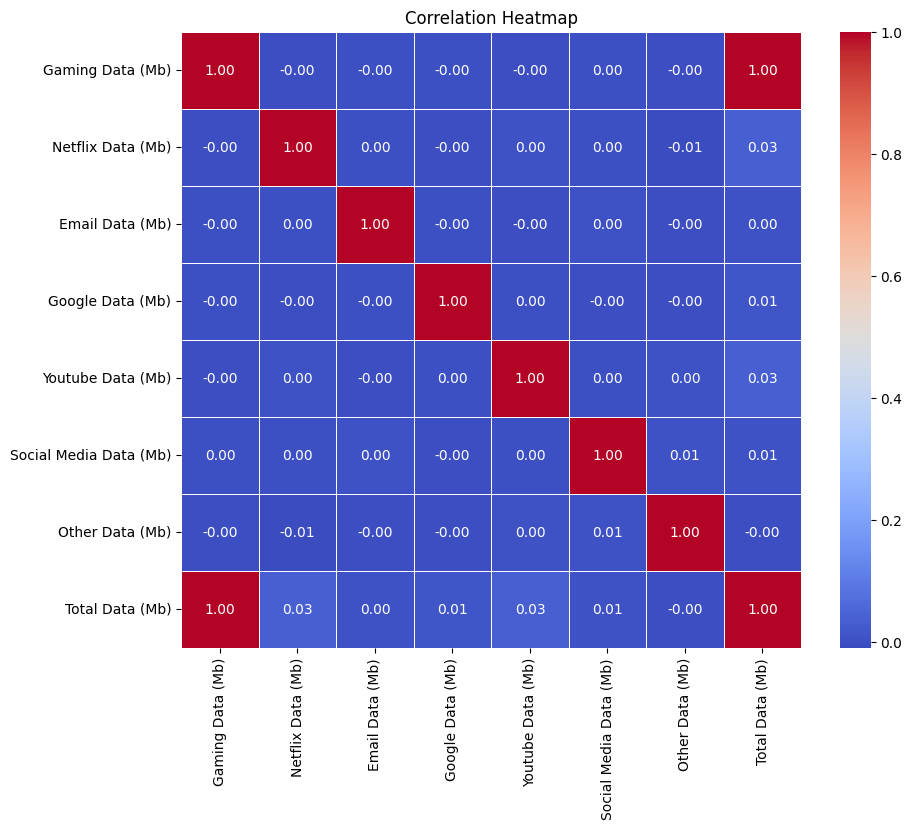

In [41]:
# Select relevant columns for analysis (specific apps' data usage and total data usage)
apps_data_columns = ['Gaming Data (Mb)', 'Netflix Data (Mb)', 'Email Data (Mb)', 'Google Data (Mb)', 'Youtube Data (Mb)', 'Social Media Data (Mb)', 'Other Data (Mb)', 'Total Data (Mb)']
apps_data_df = df[apps_data_columns]

# Calculate correlation matrix to measure the relationship between variables
correlation_matrix = apps_data_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot a heatmap of the correlation matrix for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## User Engagement analysis

### engagement metrics

In [42]:
# engagement metrics

# Step 1: Group by user
grouped_data = df_relevant.groupby('MSISDN/Number')

# Step 2: Compute aggregates
engagement_metrics = grouped_data.agg({
    'Bearer Id': 'count',
    'Total Data (Mb)': 'sum',
    'Dur. (hr)': 'sum',
})

engagement_metrics.rename(columns={'Bearer Id': 'Number of Sessions'}, inplace=True)

# Step 3: Sort by Number of Sessions in descending order
engagement_metrics_sorted = engagement_metrics.sort_values(by=['Number of Sessions', 'Dur. (hr)'], ascending=False)


# Display the aggregated data
# engagement_metrics_sorted.head(5)
engagement_metrics_sorted.tail(5)

,Number of Sessions,Total Data (Mb),Dur. (hr)
MSISDN/Number,,,
3.365043e+10,1,199.216558,2.018616
3.369839e+10,1,797.900773,2.016133
3.365933e+10,1,266.842393,1.996944
3.366566e+10,1,647.084608,1.985159
3.376351e+10,1,532.469647,1.984163


#### Engagement k-means clustering

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Define a threshold for the number of sessions (e.g., 95th percentile)
threshold_sessions = engagement_metrics_sorted['Number of Sessions'].quantile(0.95)

# Filter the DataFrame to exclude rows with sessions above the threshold
filtered_data = engagement_metrics_sorted[engagement_metrics_sorted['Number of Sessions'] <= threshold_sessions]

# Proceed with Min-Max normalization and clustering on filtered_data


# Extract the features for clustering
X = filtered_data[['Number of Sessions', 'Total Data (Mb)', 'Dur. (hr)']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the features
X_normalized = scaler.fit_transform(X)

# Initialize the KMeans model with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the normalized data
kmeans.fit(X_normalized)

# Add the cluster labels to the DataFrame
filtered_data['Engagement Score'] = kmeans.labels_

# Define labels for the engagement groups
engagement_labels = {0: 'Low Engagement', 1: 'Moderate Engagement', 2: 'High Engagement'}

# Map cluster labels to engagement groups
filtered_data['Engagement Group'] = filtered_data['Engagement Score'].map(engagement_labels)

# Display the clustered engagement metrics
print(filtered_data.head(10))


               Number of Sessions  Total Data (Mb)   Dur. (hr)  \
MSISDN/Number                                                    
3.366768e+10                    3       708.619061  881.895723   
3.366217e+10                    3      1351.611322  644.392814   
3.366915e+10                    3      1762.238523  638.322623   
3.367067e+10                    3      1331.291696  579.408858   
3.366045e+10                    3       517.783782  438.036234   
3.362498e+10                    3      1818.287798  404.166872   
3.366863e+10                    3      1046.632121  403.099476   
3.369859e+10                    3      1738.073669  385.780168   
3.366367e+10                    3      1589.540668  367.057898   
3.365275e+10                    3      1429.448356  366.542414   

              Engagement Group  Engagement Score  
MSISDN/Number                                     
3.366768e+10   High Engagement                 2  
3.366217e+10   High Engagement                 2  
3.3

/tmp/ipykernel_15569/2037226302.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Engagement Score'] = kmeans.labels_
/tmp/ipykernel_15569/2037226302.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Engagement Group'] = filtered_data['Engagement Score'].map(engagement_labels)


In [66]:
# Count of each engagement group
engagement_group_count = filtered_data['Engagement Group'].value_counts()

# Percentage of each engagement group
engagement_group_percentage = filtered_data['Engagement Group'].value_counts(normalize=True) * 100

# Display the count and percentage of each engagement group
print("Engagement Group Count:")
print(engagement_group_count)

print("\nEngagement Group Percentage:")
print(engagement_group_percentage)

Engagement Group Count:
Engagement Group
Low Engagement         77731
Moderate Engagement    21452
High Engagement         4422
Name: count, dtype: int64

Engagement Group Percentage:
Engagement Group
Low Engagement         75.026302
Moderate Engagement    20.705564
High Engagement         4.268134
Name: proportion, dtype: float64
